In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import seaborn.apionly as sns
import numpy as np
import trendvis

from coda import EventTransformer, BIDSEventReader
from glob import glob


In [2]:
reader = BIDSEventReader()
all_runs = pd.concat([reader.read(f) for f in glob('*.tsv')])

transformer = EventTransformer(all_runs)
transformer.resample(1)
data = transformer.data
data = data.fillna('0')
data = data.convert_objects(convert_numeric=True)

C:\Users\aid338\AppData\Roaming\Python\Python35\site-packages\coda\events.py:374: UserWarning: Setting amplitude to values in column 'ampliude'
  warnings.warn("Setting amplitude to values in column 'ampliude'")
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [3]:
data.columns
data = data.rename(columns={'long_freq' : 'frequency', 'concreteness' : 'concrete', 'maxfaceConfidence' : 'face', 
                           '60_250':'60-250 hz', 'word' : 'speech'})

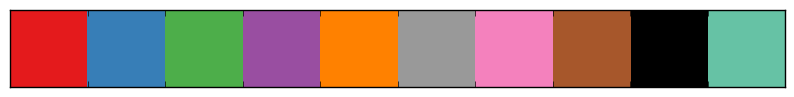

In [4]:
colors = sns.color_palette('Set1', 11)[0:5] + list(reversed(sns.color_palette('Set1', 11)[6:9])) + [(0, 0, 0)] + sns.color_palette('Set2', 1)
sns.palplot(colors)

In [5]:
columns = data.columns.drop('onset')
columns = ['street', 'outdoors', 'light', 'adult', 'face', 'speech', 'frequency',
       'concrete', 'sentiment', '60-250 hz']

In [8]:
y_ratios = [1] * len(columns)
plot_data = [[(data.onset.values, data[col].values, colors[i])] for i, col in enumerate(columns)]
lw = 1.4

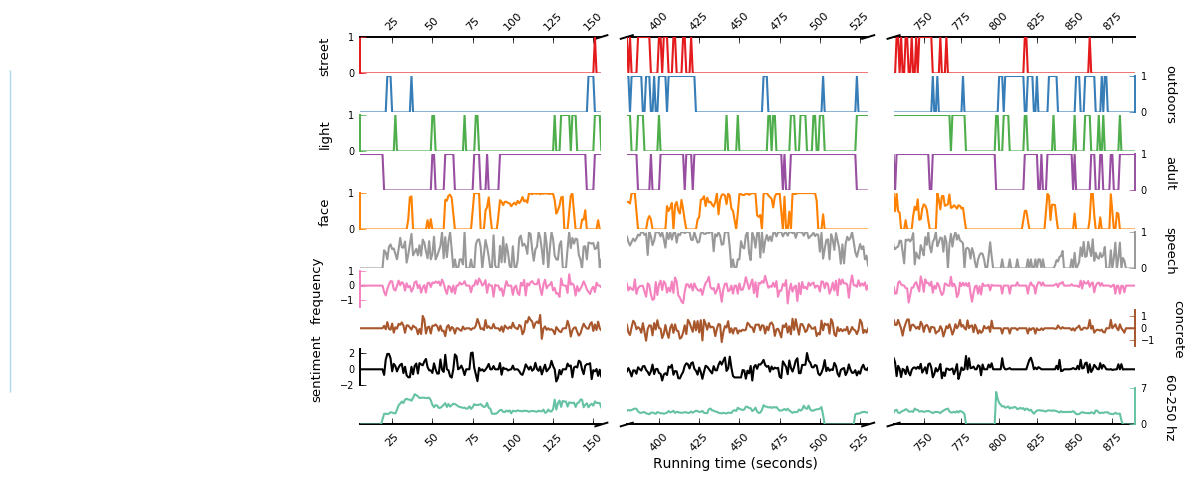

In [21]:
# Initialize XGrid
ex2 = trendvis.XGrid(y_ratios, xratios=[3, 3, 3], figsize=(10, 5))

trendvis.plot_data(ex2, plot_data, lw=1.5, marker=None)

# Handle axis ticks
ex2.cleanup_grid()
ex2.set_spinewidth(lw)
ex2.autocolor_spines()
ex2.set_all_ticknums([(25, 25), (25, 25), (25, 25)],
                     [(1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (2, 2),  (7, 7)])

ex2.set_ylabels(columns)

# Rotate x-axis tick labels
for ax in ex2.fig.axes:
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, fontsize=8)
    plt.setp(ax.yaxis.get_label(), fontsize=9.5)
    plt.setp(ax.yaxis.get_majorticklabels(), fontsize=7)

# Draw a vertical bar behind the data - horizontal bars available too
ex2.draw_bar(ex2.axes[0][1], ex2.axes[9][1], (10, 10), color='lightblue')

# Set limts of each cutout
ex2.set_xlim([(0, 5, 155), (1, 380, 530), (2, 730, 890)])

# Cutouts instead of frames
ex2.draw_cutout(lw=lw)

# Set the suptitle and compact the plot
# ex2.fig.suptitle('Timecourse of movie features', fontsize=14, y=1.02);
ex2.fig.subplots_adjust(hspace=0.07, wspace=.4)
ex2.fig.text(0.5, 0.04, 'Running time (seconds)', fontsize=10, ha='center')
# plt.savefig('kdd_timeline_plot.png', transparent=False)

In [19]:
?ex2.draw_bar

## fMRI

In [7]:
from nilearn import plotting as niplt

In [8]:
# Number of subjects
import glob
main_path = 'd:/neuroscout/analyses/hcp/kdd_fx/'
len(glob.glob(main_path + '[0-9]*/'))

35

C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


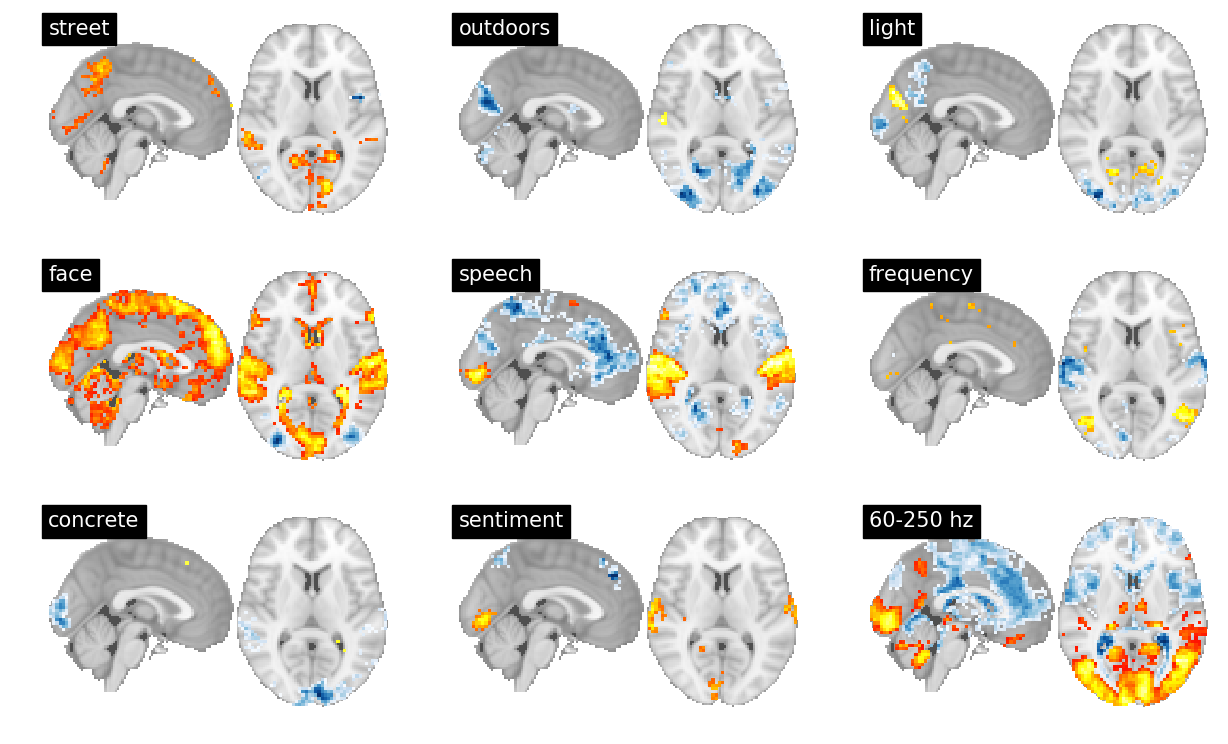

In [11]:
conditions = ['street', 'outdoors', 'light', 'adult', 'sentiment',
              'frequency', 'concrete', 'speech',
              '60-250 hz',
              'face']
conditions = dict(zip(conditions, range(1, len(conditions) + 1)))

plot_these = ['street', 'outdoors', 'light', 'face', 'speech', 'frequency',
       'concrete', 'sentiment', '60-250 hz']

path = 'd:/neuroscout/analyses/hcp/kdd_fx/group/stats/'
f, axarr = plt.subplots(3, 3, figsize=(15, 9))
for i, col in enumerate(plot_these):
    con_id = conditions[col]
    p = niplt.plot_stat_map(
        path + 'contrast_{:02}/zstat1_threshold.nii.gz'.format(con_id),
        title = col, cut_coords = [0, 7], draw_cross=False, colorbar=False,
        axes = axarr.flatten()[i], display_mode='xz', annotate=False, threshold=3.29)
    p.add_overlay(
        path + 'contrast_{:02}/zstat1_maths_threshold.nii.gz'.format(con_id), cmap='Blues')

plt.savefig('kdd_fmri_plot.png', transparent=False)

In [11]:
main_path = 'd:/neuroscout/analyses/hcp/kdd_all_PA_/'
len(glob.glob(main_path + '[0-9]*/'))

26

C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


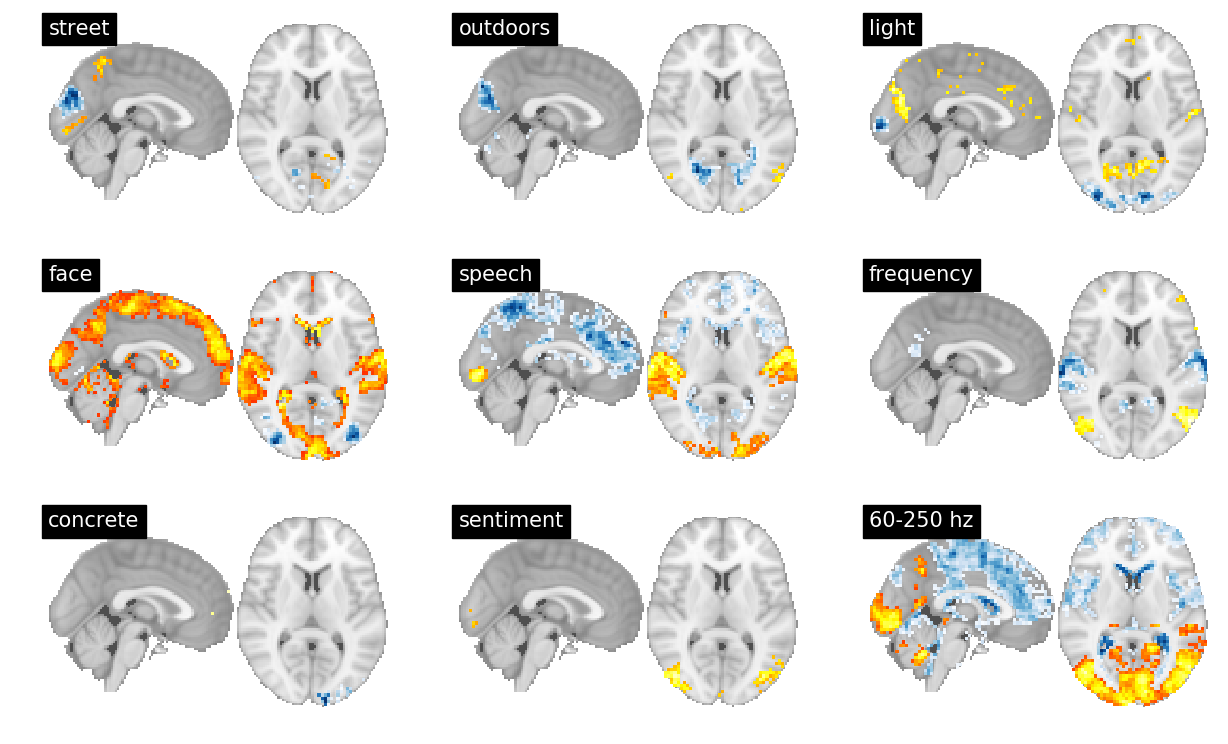

In [17]:
path = 'd:/neuroscout/analyses/hcp/kdd_all_PA/group/stats/'
f, axarr = plt.subplots(3, 3, figsize=(15, 9))
for i, col in enumerate(plot_these):
    con_id = conditions[col]
    p = niplt.plot_stat_map(
        path + 'contrast_{:02}/zstat1_threshold.nii.gz'.format(con_id),
        title = col, cut_coords = [0, 7], draw_cross=False, colorbar=False,
        axes = axarr.flatten()[i], display_mode='xz', annotate=False, threshold=3.29)
    p.add_overlay(
        path + 'contrast_{:02}/zstat1_maths_threshold.nii.gz'.format(con_id), cmap='Blues')

plt.savefig('kdd_fmri_plot_PA.png', transparent=False)

In [14]:
main_path = 'd:/neuroscout/analyses/hcp/kdd_all_PA_motion/'
len(glob.glob(main_path + '[0-9]*/'))

45

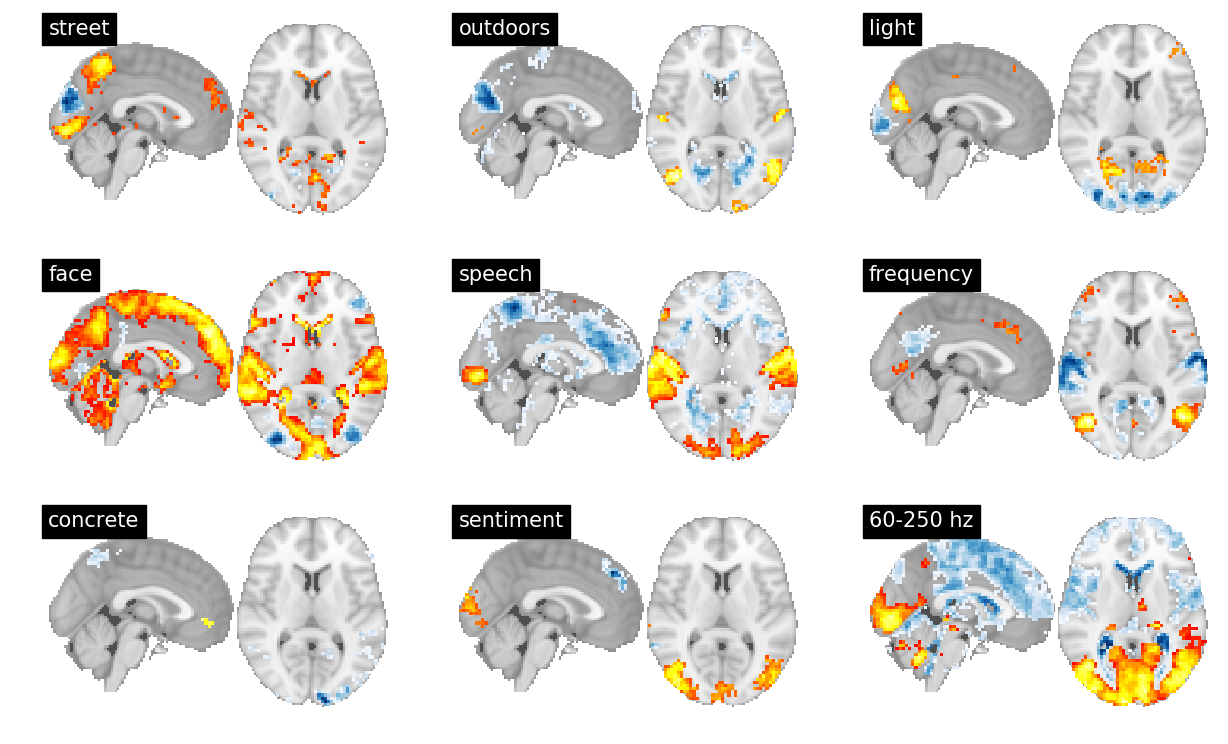

In [16]:
path = 'd:/neuroscout/analyses/hcp/kdd_all_PA_motion/group/stats/'
f, axarr = plt.subplots(3, 3, figsize=(15, 9))
for i, col in enumerate(plot_these):
    con_id = conditions[col]
    p = niplt.plot_stat_map(
        path + 'contrast_{:02}/zstat1_threshold.nii.gz'.format(con_id),
        title = col, cut_coords = [0, 7], draw_cross=False, colorbar=False,
        axes = axarr.flatten()[i], display_mode='xz', annotate=False, threshold=3.29)
    p.add_overlay(
        path + 'contrast_{:02}/zstat1_maths_threshold.nii.gz'.format(con_id), cmap='Blues')

plt.savefig('kdd_fmri_plot_PA_motion.png', transparent=False)

In [51]:
from IPython.display import Image
path = 'd:/neuroscout/analyses/hcp/kdd_all_PA_motion/'
for p in glob.glob(path + '*\qa\model\*\*[01].png'):
    Image(p)


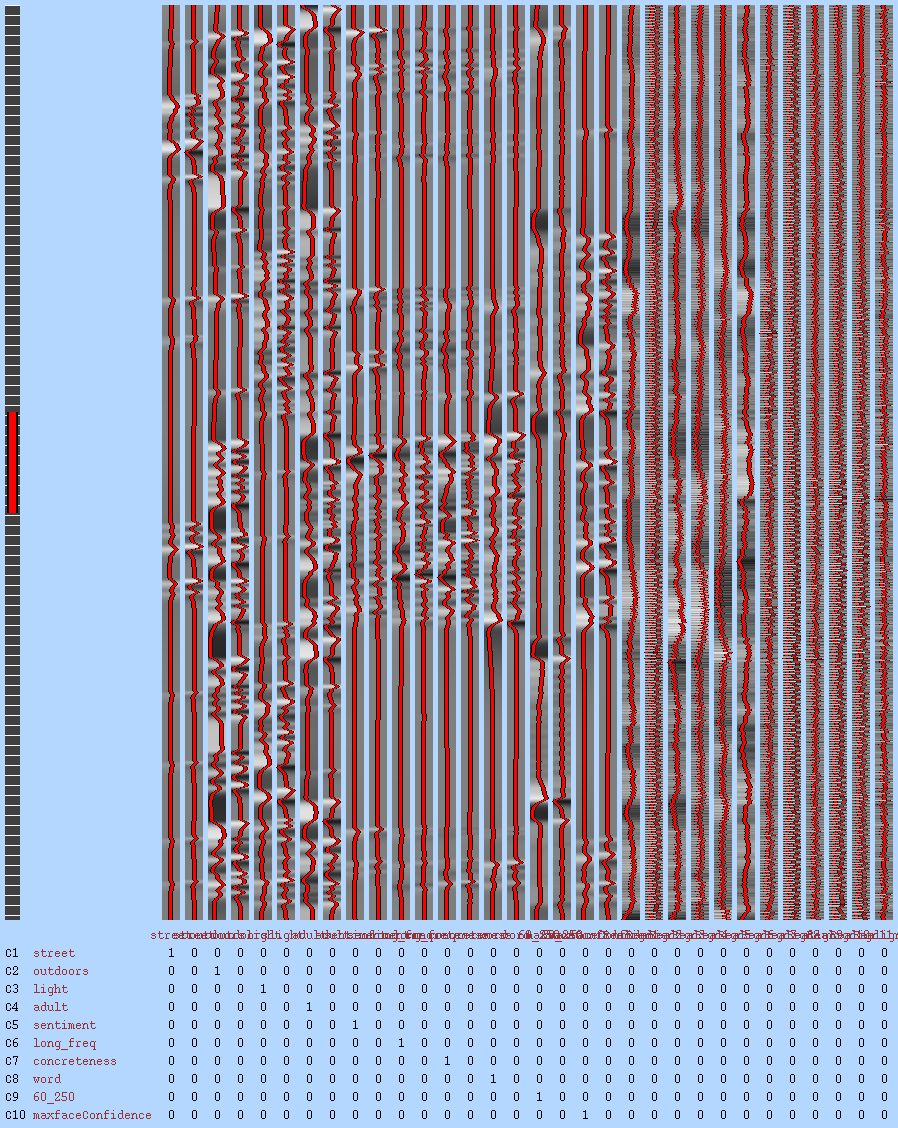

In [52]:
Image(p)